# Optical depth cluster lensing

* In robertson et al. paper, they had shown that the optical depth of the lensing clusters can still be taken to be tau_sis (combined with the Tinker et al. halo mass func) .. see blue dashed vs blue solid curve 

* Plot ref: https://git.ligo.org/anupreeta.more/lens_stats/-/wikis/Code-Review#optical-depth-comparison-for-the-robertson-et-al-galaxy-cluster-lensing

* Code ref: https://git.ligo.org/anupreeta.more/lens_stats/-/blob/ee29d70cbff6487704f8624f97652e17b22c809b/outputs_plots/plot_tau_rob.py

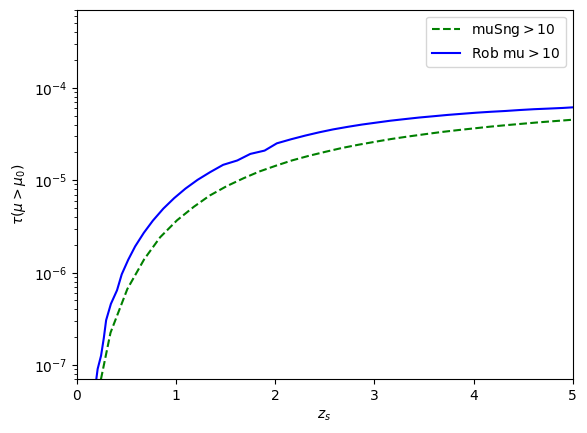

In [1]:
import numpy as np
from pylab import *
from scipy.interpolate import interp1d
import sys
from astropy.cosmology import Planck15
import numpy as np
import pylab as plt

finp_t1="tau_tst_clus_mu10_mf1.txt"  ## Anupreeta's calculation for brighter lensed events detected by cluster-scale lenses
finp_t2="tau_zs_bluedash.csv"     ## Robertson et al. 

z_t1,cum_t1=np.loadtxt(finp_t1,usecols=(0,1),unpack=True)
z_t2,cum_t2=np.loadtxt(finp_t2,usecols=(0,1),unpack=True)

ax=subplot(1,1,1)
ax.plot(z_t1,cum_t1,color="green",ls="dashed",label="muSng$>10$")
ax.plot(z_t2,cum_t2,color="blue",label="Rob mu$>10$")

ax.set_ylabel(r'$\tau(\mu>\mu_0$)')
ax.set_xlabel("$z_s$ ")
ax.set_yscale("log")
ax.set_ylim(7e-8,7e-4)
ax.set_xlim(0,5)
ax.legend()

subplots_adjust(wspace=0.4, hspace=0.4)
savefig("optdepth_robcomp.png", bbox_inches="tight")


In [4]:
# interpolate the optical depth
f_t1=interp1d(z_t1,cum_t1, kind='cubic')
f_t2=interp1d(z_t2,cum_t2, kind='cubic')

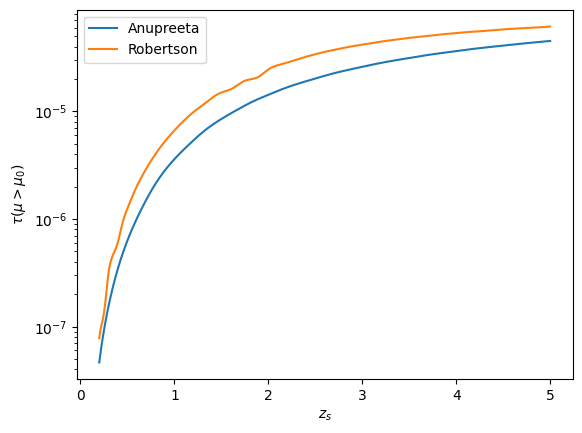

In [6]:
# plot the interpolated optical depth
z=np.linspace(0.2,5,1000)
plt.figure()
plt.plot(z,f_t1(z),label="Anupreeta")
plt.plot(z,f_t2(z),label="Robertson")
plt.yscale("log")
plt.legend()
plt.xlabel("$z_s$")
plt.ylabel(r'$\tau(\mu>\mu_0$)')
#plt.savefig("optdepth_robcomp_interp.png", bbox_inches="tight")
plt.show()